# [ 도식화와 시각화 ]

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10,6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'F:\\Jupyternotebook\\version_3.0\\pydataAnalysis'

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

## 8.1 matplotlib API 간략하게 살펴보기

### 8.1.1: Figure와 Subplots

In [6]:
import matplotlib.pyplot as plt

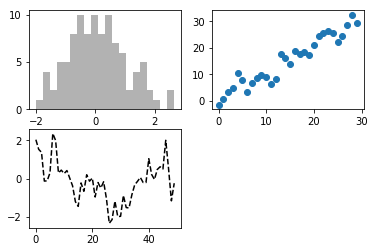

In [11]:
fig = plt.figure() # 그래프는 figure 객체 내에 존재.

ax1 = fig.add_subplot(2,2,1) # 크기: 2 * 2, 첫번째(1)를 선택
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3)

from numpy.random import randn
plt.plot(randn(50).cumsum(),'k--') # ax3 fig 플롯

_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))
plt.show()
plt.close('all') # 모든 fig 닫기?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D3DE77860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027D3E0CD400>]], dtype=object)

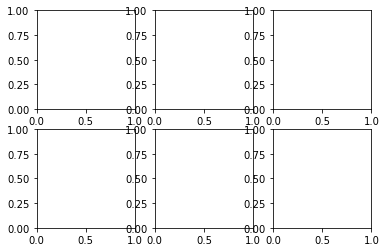

In [14]:
fig, axes = plt.subplots(2,3) # (2,3) 배열 형태로 플롯을 생성하여 반환.
axes

- nrows : 서브플롯의 로우수
- ncols : 서브플롯의 컬럼수
- sharex : 모든 서브플롯이 같은 x축 눈금을 사용하도록 한다(xlim값 조절하면 모든 서브플롯에 적용)
- sharey : 모든 서브플롯이 같은 y축 눈금을 사용하도록 한다(ylim값 조절하면 모든 서브플롯에 적용) 

#### 서브플롯 간 간격 조절

In [32]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

(array([  1.,   1.,   0.,   3.,   0.,   1.,   1.,   3.,   2.,   2.,   7.,
          3.,   7.,   8.,  10.,  12.,  16.,  16.,  11.,  14.,  21.,  36.,
         29.,  27.,  24.,  30.,  25.,  27.,  22.,  31.,  22.,  17.,   9.,
         13.,  11.,  10.,   5.,   5.,   5.,   4.,   5.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([-3.3981, -3.2597, -3.1213, -2.9829, -2.8445, -2.7062, -2.5678,
        -2.4294, -2.291 , -2.1526, -2.0142, -1.8759, -1.7375, -1.5991,
        -1.4607, -1.3223, -1.1839, -1.0456, -0.9072, -0.7688, -0.6304,
        -0.492 , -0.3536, -0.2152, -0.0769,  0.0615,  0.1999,  0.3383,
         0.4767,  0.6151,  0.7534,  0.8918,  1.0302,  1.1686,  1.307 ,
         1.4454,  1.5838,  1.7221,  1.8605,  1.9989,  2.1373,  2.2757,
         2.4141,  2.5524,  2.6908,  2.8292,  2.9676,  3.106 ,  3.2444,
         3.3828,  3.5211]),
 <a list of 50 Patch objects>)

(array([  1.,   1.,   0.,   0.,   1.,   0.,   2.,   5.,   3.,   6.,   2.,
          5.,   4.,  15.,  11.,  11.,  11.,  11.,  15.,  22.,  12.,  20.,
         24.,  17.,  27.,  16.,  23.,  26.,  20.,  14.,  16.,  16.,  21.,
         13.,  17.,  15.,  14.,  13.,   6.,   4.,   3.,   8.,   7.,   7.,
          2.,   3.,   3.,   3.,   2.,   2.]),
 array([-2.7945, -2.6879, -2.5814, -2.4748, -2.3683, -2.2617, -2.1552,
        -2.0486, -1.9421, -1.8355, -1.729 , -1.6224, -1.5159, -1.4093,
        -1.3028, -1.1962, -1.0896, -0.9831, -0.8765, -0.77  , -0.6634,
        -0.5569, -0.4503, -0.3438, -0.2372, -0.1307, -0.0241,  0.0824,
         0.189 ,  0.2955,  0.4021,  0.5086,  0.6152,  0.7217,  0.8283,
         0.9348,  1.0414,  1.1479,  1.2545,  1.361 ,  1.4676,  1.5741,
         1.6807,  1.7872,  1.8938,  2.0004,  2.1069,  2.2135,  2.32  ,
         2.4266,  2.5331]),
 <a list of 50 Patch objects>)

(array([  3.,   1.,   0.,   1.,   2.,   3.,   2.,   1.,   6.,   9.,   8.,
          5.,   8.,  17.,  10.,  17.,  18.,  15.,  19.,  27.,  22.,  21.,
         30.,  22.,  23.,  21.,  24.,  20.,  23.,  17.,  10.,   8.,  15.,
         17.,  14.,  11.,   3.,   4.,   5.,   7.,   1.,   2.,   1.,   0.,
          3.,   2.,   1.,   0.,   0.,   1.]),
 array([-2.6084, -2.4982, -2.388 , -2.2778, -2.1675, -2.0573, -1.9471,
        -1.8369, -1.7267, -1.6165, -1.5063, -1.3961, -1.2859, -1.1756,
        -1.0654, -0.9552, -0.845 , -0.7348, -0.6246, -0.5144, -0.4042,
        -0.294 , -0.1838, -0.0735,  0.0367,  0.1469,  0.2571,  0.3673,
         0.4775,  0.5877,  0.6979,  0.8081,  0.9184,  1.0286,  1.1388,
         1.249 ,  1.3592,  1.4694,  1.5796,  1.6898,  1.8   ,  1.9102,
         2.0205,  2.1307,  2.2409,  2.3511,  2.4613,  2.5715,  2.6817,
         2.7919,  2.9021]),
 <a list of 50 Patch objects>)

(array([  2.,   2.,   1.,   4.,   2.,   7.,   1.,   4.,   6.,  10.,   7.,
         10.,   7.,  18.,  16.,  16.,  20.,  19.,  22.,  23.,  13.,  26.,
         24.,  20.,  18.,  24.,  25.,  27.,  20.,  11.,  17.,  11.,  11.,
         13.,   8.,   7.,   6.,   6.,   2.,   3.,   3.,   2.,   1.,   2.,
          2.,   0.,   0.,   0.,   0.,   1.]),
 array([-2.7182, -2.5958, -2.4735, -2.3512, -2.2288, -2.1065, -1.9842,
        -1.8619, -1.7395, -1.6172, -1.4949, -1.3725, -1.2502, -1.1279,
        -1.0055, -0.8832, -0.7609, -0.6385, -0.5162, -0.3939, -0.2715,
        -0.1492, -0.0269,  0.0955,  0.2178,  0.3401,  0.4625,  0.5848,
         0.7071,  0.8295,  0.9518,  1.0741,  1.1964,  1.3188,  1.4411,
         1.5634,  1.6858,  1.8081,  1.9304,  2.0528,  2.1751,  2.2974,
         2.4198,  2.5421,  2.6644,  2.7868,  2.9091,  3.0314,  3.1538,
         3.2761,  3.3984]),
 <a list of 50 Patch objects>)

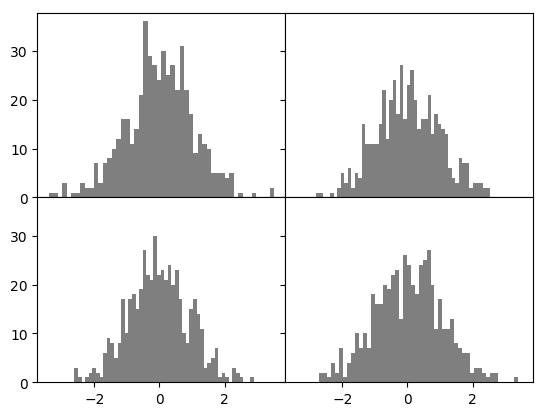

In [33]:
# Figure의 subplots_adjust 메서드.
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)
# wspace, hspace : 서브플롯 간 간격을 위해 figure의 너비와 높이를 조절.
plt.subplots_adjust(wspace=0, hspace=0)

### 8.1.2: 색상, 마커, 선 스타일
- style 사용 : 다양한 모양을 미리 설정해 놓은 묶음

In [21]:
import matplotlib

dir(matplotlib.style)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'available',
 'context',
 'core',
 'library',
 'reload_library',
 'use']

In [23]:
matplotlib.style.available?

In [25]:
# 스타일들의 설정 정보
matplotlib.style.library

{'_classic_test': RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useof

In [27]:
matplotlib.style.library['ggplot']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.grid': True,
          'axes.labelcolor': '#555555',
          'axes.labelsize': 'large',
          'axes.linewidth': 1.0,
          'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
          'axes.titlesize': 'x-large',
          'figure.edgecolor': '0.50',
          'figure.facecolor': 'white',
          'font.size': 10.0,
          'grid.color': 'white',
          'grid.linestyle': '-',
          'patch.antialiased': True,
          'patch.edgecolor': '#EEEEEE',
          'patch.facecolor': '#348ABD',
          'patch.linewidth': 0.5,
          'xtick.color': '#555555',
          'xtick.direction': 'out',
          'ytick.color': '#555555',
          'ytick.direction': 'out'})

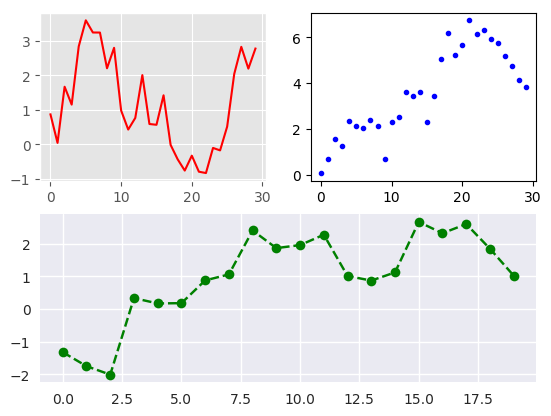

In [30]:
fig = plt.figure()

# 스타일 사용
matplotlib.style.use('ggplot')
ax1 = fig.add_subplot(2,2,1)
ax1.plot(np.random.randn(30).cumsum(),'r-') # '-': 실선,  '--': 점선

matplotlib.style.use('seaborn')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(np.random.randn(20).cumsum(),'go--')

matplotlib.style.use('default')
ax3 = fig.add_subplot(2,2,2)
ax3.plot(np.random.randn(30).cumsum(),'b.')

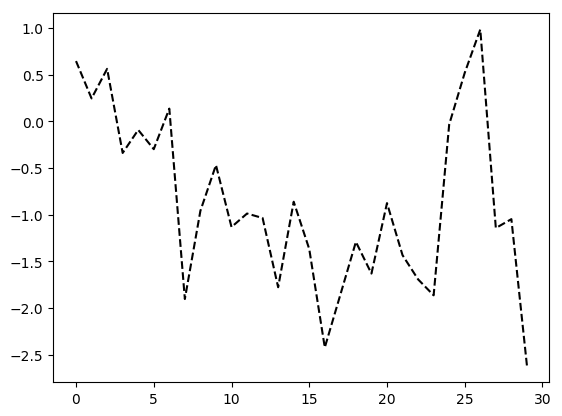

In [34]:
fig.clear()
plt.plot(np.random.randn(30).cumsum(),'k--')

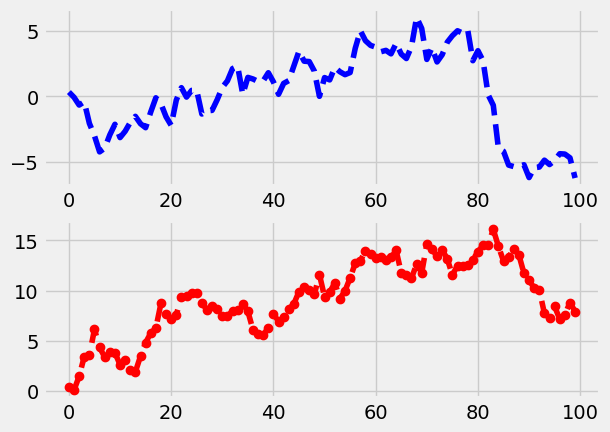

In [36]:
fig.clear()
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(np.random.randn(100).cumsum(), 'b--')
matplotlib.style.use('fivethirtyeight')
ax2 = fig.add_subplot(212)
ax2.plot(np.random.randn(100).cumsum(), 'ro--')

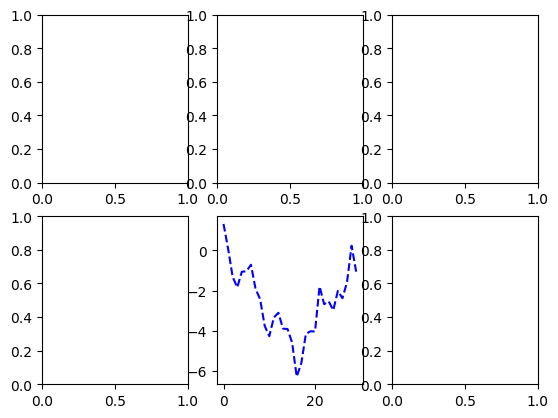

In [38]:
matplotlib.style.use('default')
fig, axes = plt.subplots(2,3)
axes[1, 1].plot(np.random.randn(30).cumsum(), 'b--')

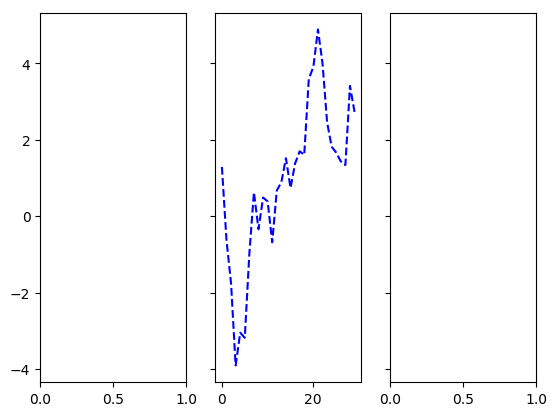

In [39]:
fig, axes = plt.subplots(1,3, sharey=True)
axes[1].plot(np.random.randn(30).cumsum(), 'b--')

In [41]:
plt.figure()

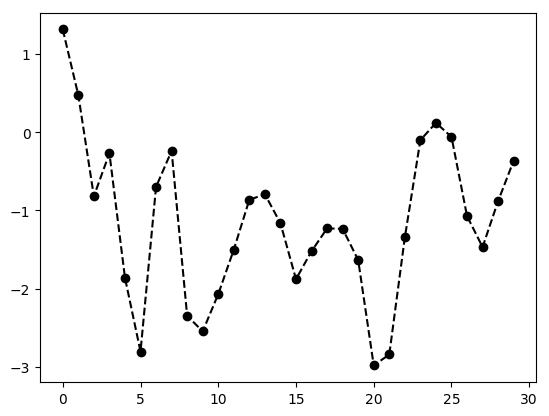

In [43]:
plt.plot(randn(30).cumsum(), 'ko--')

In [45]:
plt.close('all')

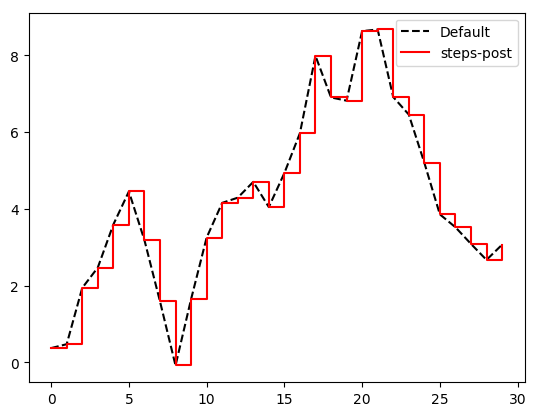

In [47]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

# drawstyle 두점을 잇는 방법 steps-post 계단처럼 기본값=line 
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post') 

# 범례 best 제일 좋은곳에 알아서 
plt.legend(loc='best')

### 8.1.3: 눈금, 라벨, 범례

#### 제목, 축 이름, 눈금, 눈금이름 설정하기.

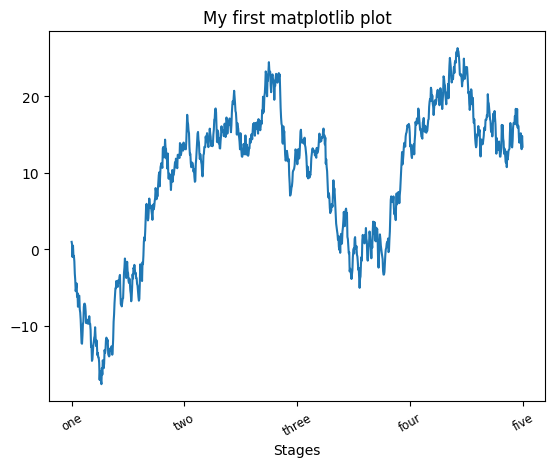

In [49]:
fig = plt.figure();  ax = fig.add_subplot(1, 1, 1) #분할할꺼 아니면 안해도됨 
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # x 축의 분할 값 
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') # 각 분할 값의 label 
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### 범례 추가하기.

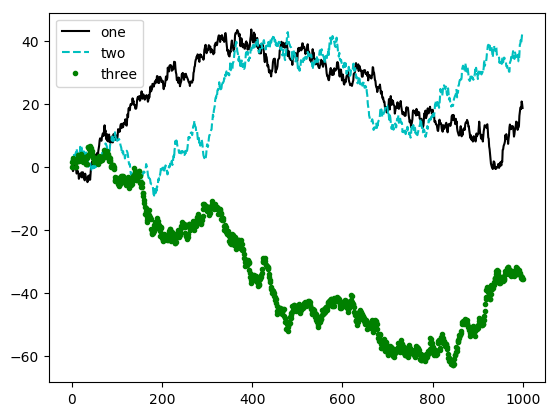

In [51]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'c--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
# 범례 : label
ax.legend(loc='best')

### 8.1.4: 주석과 그림추가

(732677.0, 734138.0)

(600, 1800)

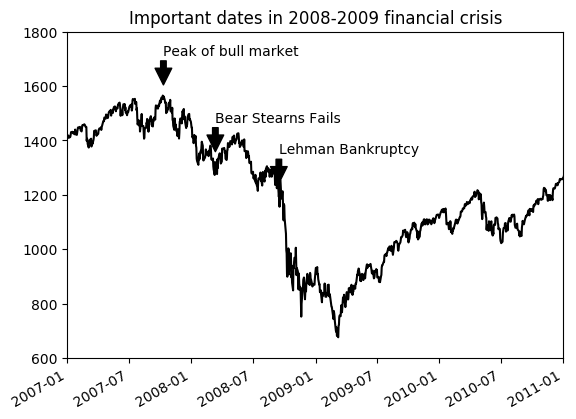

In [63]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# annotate : 특정 위치에 글자 넣기 
# horizontalalignment 왼쪽 정렬 verticalalignment 위로 정렬함 
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')
# plt.close('all')

In [61]:
# 도형 그리기
fig = plt.figure()

# patch 클래스 객체
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],[0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

### 8.1.5: 그래프를 파일로 저장

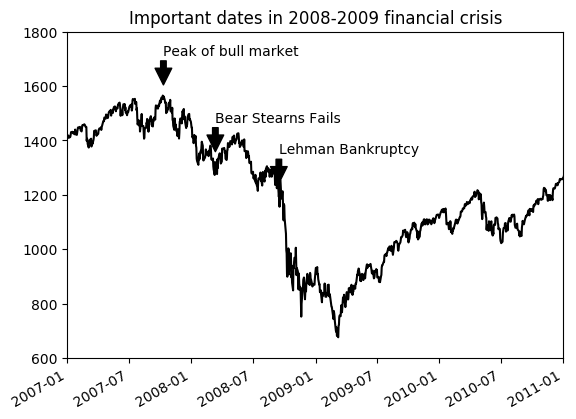

In [65]:
fig

In [67]:
fig.savefig('figpath.svg') # savefig : 파일로 저장.

In [69]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight') # png 파일로 저장.

[Figure.savefig 옵션]
- fname : 파일 경로나 파이썬의 파일과 유사한 객체를 나타내는 문자열
- dpi : 해상도(기본값: 100)
- facecolor, edge color : 서브플롯 바깥배경 생상, 기본값은 w(흰색)
- format : 명시적인 파일포맷(.png, .pdf, .svg, .ps 등)
- bbox_inches : 저장시 'tight' 라고 지정하면 figure 둘레의 비어있는 공간을 제거

### 8.1.6: matplotlib 설정.

In [71]:
# rc : resource configuration : 자원의 설정정보를 >> 프로그래밍적으로 설정.
plt.rc('figure', figsize=(4, 4)) # 그림사이즈[기본값 6,4]

In [73]:
# 사전에 /** 를 넣으면 전부 분리되서 들어감
font_option = {'family':'monospace',
               'weight':'bold',
               'size' : 11
              }
# 키 밸류 값으로 분류되어 들어감 한번 설정해 놓고 계속 쓸 수 있음.
plt.rc('font', **font_option)

## 8.2 pandas에서 그래프 그리기.

### 8.2.1: 선 그래프

In [76]:
plt.close('all')

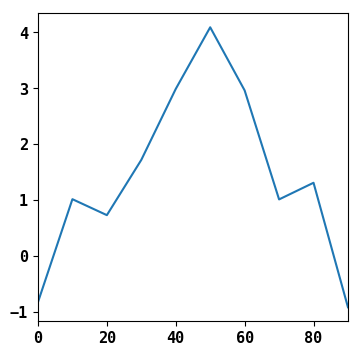

In [78]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

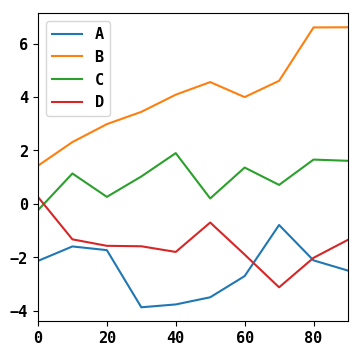

In [80]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### 8.2.2: 막대 그래프

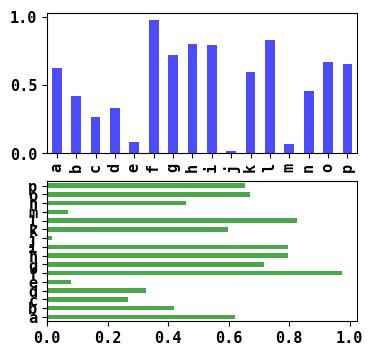

In [82]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7) # 수직막대
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7) # 수평막대

Genus,A,B,C,D
one,0.685606,0.083158,0.711029,0.252216
two,0.408780,0.094802,0.365538,0.721651
three,0.266717,0.012858,0.374667,0.551436
four,0.301401,0.912949,0.463523,0.793071
five,0.913787,0.517335,0.161018,0.851677
six,0.259245,0.398006,0.062174,0.270452


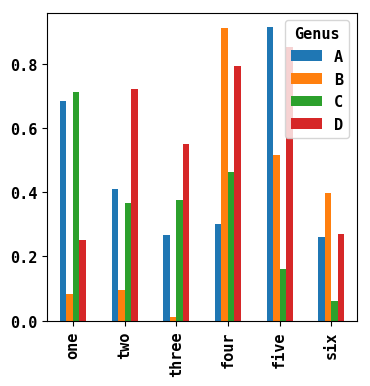

In [84]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [86]:
plt.figure()

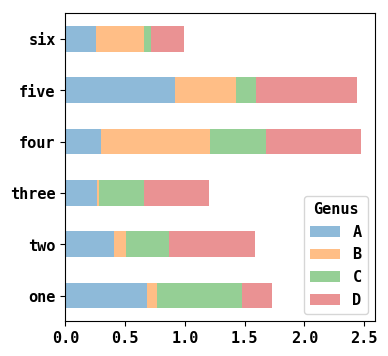

In [89]:
# stacked : 로우의 값이 하나의 막대에 쌓여서 출력.
df.plot(kind='barh', stacked=True, alpha=0.5) 

In [94]:
tips = pd.read_csv('ch08/tips.csv')
# tips
# 컬럼의 사이즈가 아님  tips 데이터프레임의 row 개수  이름이 겹침
#party_counts = pd.crosstab(tips.day, tips.size) 
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5] # label 이여서 5도 포함됨

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


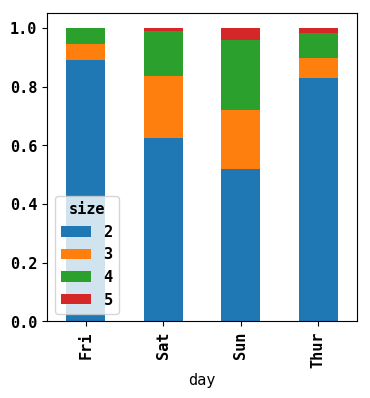

In [96]:
# 총합이 1이 되도록 정규화.
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### 8.2.3: 히스토그램과 밀도그래프

In [98]:
plt.figure()

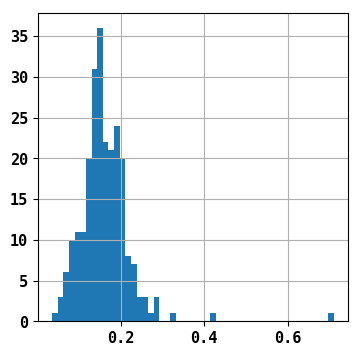

In [100]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # 전체 결제 금액 대비 팀 비율
tips['tip_pct'].hist(bins=50)

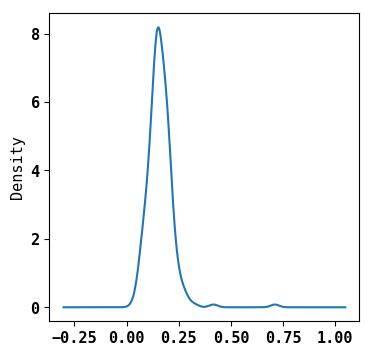

In [102]:
# kde(Kind Density Estimate) : 커널 밀도 추정 그래프.
tips['tip_pct'].plot(kind='kde')

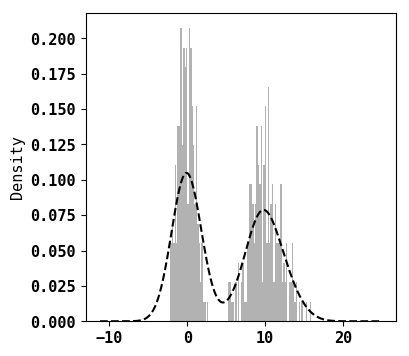

In [104]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 8.2.4: 산포도
- 2개의 1차원 데이터 묶음간의 관계를 나타내고자 할 때 유용한 그래프.

In [106]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


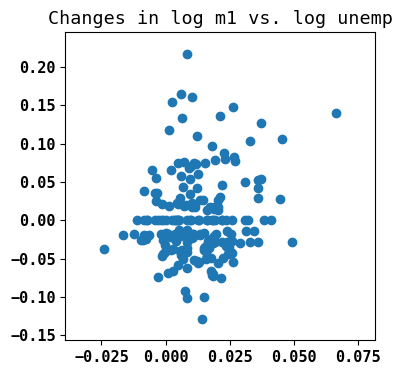

In [108]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

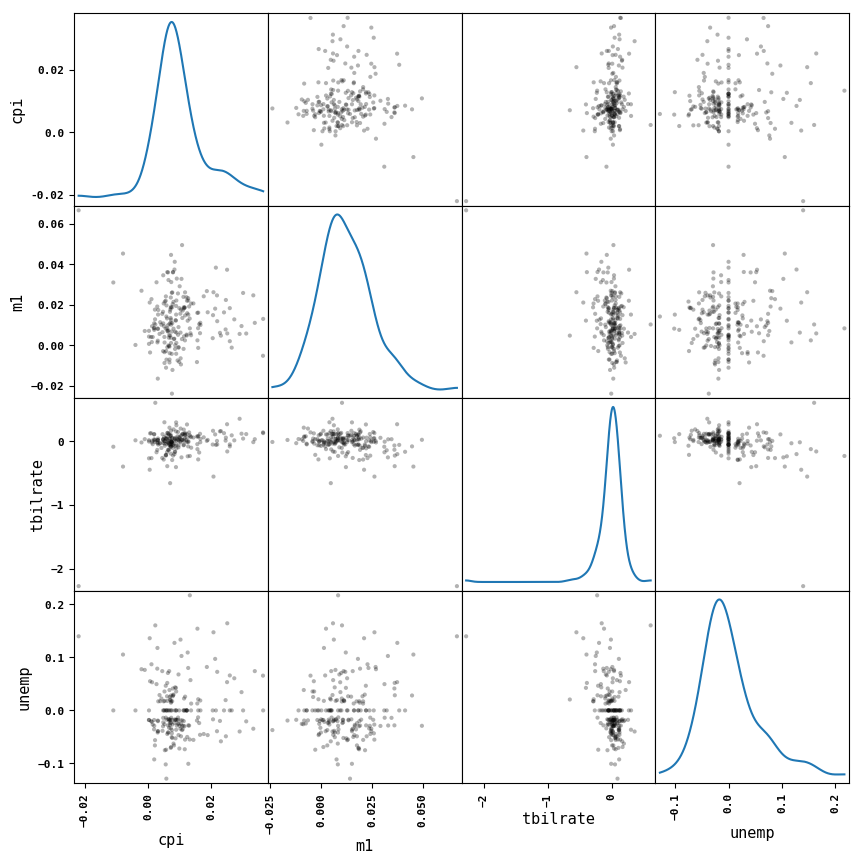

In [110]:
# scatter_matrix: 모든 관계 산포도.
# pandas는 대각선을 따라 각 변수에 대한 히스토그램이나 밀도그래프도 생성가능.
plt.rc('figure', figsize=(10,10)); # output 데이터 출력 안함 ( ; )
# pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3);
plt.rc('figure', figsize=(6,4));

## 8.3 지도그리기: 아이티 지진 데이터 시각화하기.

In [24]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [25]:
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [26]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [27]:
data.describe() # 혼재 되어 있는 경우 수치 데이터만 우선으로 보여줌

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [28]:
# LATITUDE 경도 LONGITUDE 위도
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()] # 결측값 제거.
data.head(5)
data.info()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3569 non-null int64
INCIDENT TITLE    3569 non-null object
INCIDENT DATE     3569 non-null object
LOCATION          3568 non-null object
DESCRIPTION       3569 non-null object
CATEGORY          3569 non-null object
LATITUDE          3569 non-null float64
LONGITUDE         3569 non-null float64
APPROVED          3569 non-null object
VERIFIED          3569 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 306.7+ KB


In [29]:
# 카테고리를 리스트로 변경 
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(',')) # strip 앞뒤 공백제거
    return [x for x in stripped if x]

# 모든 카테고리를 얻어옴 
def get_all_categories(cat_series):
    # 제너레이터로 만듬 
    cat_sets = (set(to_cat_list(x)) for x in cat_series) 
    return sorted(set.union(*cat_sets)) # 모든 카테고리 만들기 

# 영어로 된 부분만 추출 
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [30]:
to_cat_list('1. Urgences | Emergency, 3. Public Health,')
get_all_categories(['2. Urgences logistiques | Vital Lines', 'Vin', 'categories2'])
get_english('2. Urgences logistiques | Vital Lines')

['1. Urgences | Emergency', '3. Public Health']

['2. Urgences logistiques | Vital Lines', 'Vin', 'categories2']

('2', 'Vital Lines')

In [31]:
data.CATEGORY.head(7)

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
8    2. Urgences logistiques | Vital Lines, 2f. San...
9    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [32]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']
english_mapping.values()

'Food Shortage'

'Earthquake and aftershocks'

dict_values(['Emergency', 'Highly vulnerable', 'Medical Emergency', 'People trapped', 'Fire', 'Vital Lines', 'Food Shortage', 'Water shortage', 'Security Concern', 'Shelter needed', 'Fuel shortage', 'Power Outage', 'Public Health', 'Infectious human disease', 'Chronic care needs', 'Medical equipment and supply needs', "OBGYN/Women's Health", 'Psychiatric need', 'Security Threats', 'Looting', 'Group violence', 'Water sanitation and hygiene promotion', 'Infrastructure Damage', 'Collapsed structure', 'Unstable Structure', 'Road blocked', 'Compromised bridge', 'Communication lines down', 'Natural Hazards', 'Deaths', 'Missing Persons', 'Earthquake and aftershocks', 'Services Available', 'Food distribution point', 'Water distribution point', 'Non-food aid distribution point', 'Hospital/Clinics Operating', 'Human remains management', 'Rubble removal', 'Other', 'IDP concentration', 'Price gouging', 'Search and Rescue', 'Persons News', 'Other'])

In [33]:
# 점을 제외한 나머지로 key 제너레이터를 만듬 
def get_code(seq):
    return [x.split('.')[0] for x in seq if x] 

all_cats[:5]
all_codes = get_code(all_cats)
all_codes[:5]
code_index = pd.Index(np.unique(all_codes))
code_index[:5]

# code index 로 더미 DF 만듬 
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.info()

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

['1', '1a', '1b', '1c', '1d']

Index(['1', '1a', '1b', '1c', '1d'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 45 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
2a    3569 non-null float64
2b    3569 non-null float64
2c    3569 non-null float64
2d    3569 non-null float64
2e    3569 non-null float64
2f    3569 non-null float64
3     3569 non-null float64
3a    3569 non-null float64
3b    3569 non-null float64
3c    3569 non-null float64
3d    3569 non-null float64
3e    3569 non-null float64
4     3569 non-null float64
4a    3569 non-null float64
4c    3569 non-null float64
4e    3569 non-null float64
5     3569 non-null float64
5a    3569 non-null float64
5b    3569 non-null float64
5c    3569 non-null float64
5d    3569 non-null float64
5e    3569 non-null float64
6     3569 non-null float64
6a    3569 non-null float64
6b    3569 non-null float64
6c    3569 non-null float

In [34]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [35]:
data.index[:5]
data.CATEGORY.head(3)

Int64Index([0, 4, 5, 6, 7], dtype='int64')

0    1. Urgences | Emergency, 3. Public Health, 
4                      1. Urgences | Emergency, 
5                 5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [36]:
#인덱스와 카테고리가 묶여서 row, cat 으로 들어감
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1 #해당 항목에 대해서 1로 세팅함 

data = data.join(dummy_frame.add_prefix('category_')) # index 가 같은것 끼리 join 됨

In [37]:
data.head(5)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


- basemap 설치 : 지도그래프 그리기

In [39]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# IT 지도 
# 경위 (-75, 17.25) ~ 경위 (-71, 20.25)
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

- 아이티의 네가지 재해 데이터

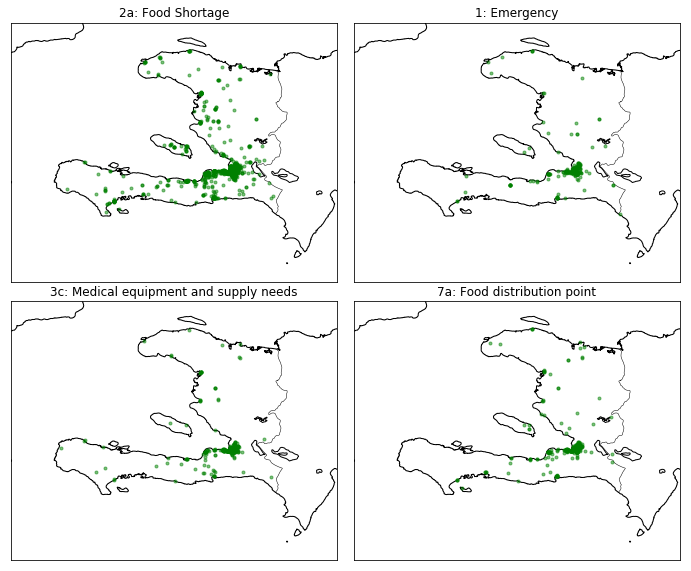

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # axes 4개 중첩리스트 
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
     # 화면상의 x,y 값을 return 해줌 

    m.plot(x, y, 'g.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x23002848e80>)

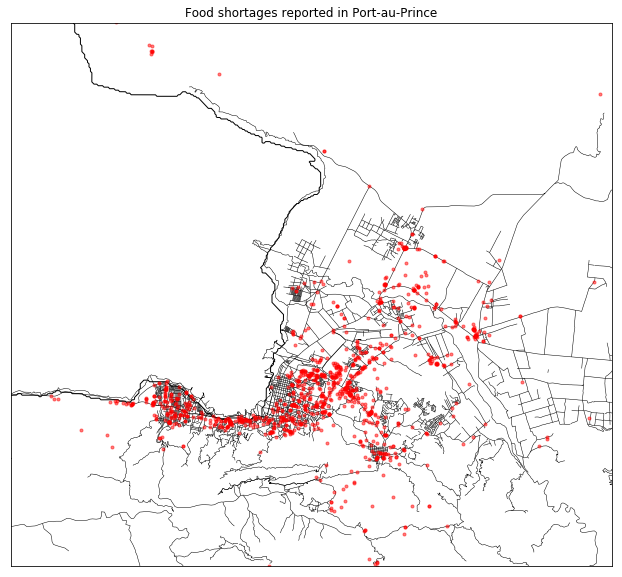

In [42]:
# 아이티 지진 재해 기간동안 포트오프린스의 식량난 보고서
plt.rc('figure', figsize=(12,10))
fig = plt.figure()
cat_data = data[data['category_2a']==1]
lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

m = basic_haiti_map(lllat=18.45, urlat=18.75, lllon=-72.5, urlon=-72.15)

shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')
x,y = m(lons.values, lats.values)

m.plot(x, y, 'r.', alpha=0.5)
fig.get_axes()[0].set_title("Food shortages reported in Port-au-Prince")

- Mayayi 3차원 이미지 그려주는 사이트 http://docs.enthought.com/mayavi/mayavi/
- Chaco 정적 그래프와 대화형 시각화 지원
- 기타 패키지: PySqt, Veusz, gnuplotpy, giggles, PyQwt, D3.js